In [167]:
#Importações para Manipulação e Análise de Dados
import pandas as pd
import numpy as np

#Importações para Visualização de Dados 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from matplotlib.ticker import FuncFormatter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Importações para Machine Learning e Pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from textblob import TextBlob
import xgboost as xgb



#Importação para Salvar o Modelo
import joblib

#Estilo estético para os gráficos do seaborn
sns.set_style('whitegrid')
#Tamanho padrão para as figuras do matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

# **Preparação e Limpeza dos dados**

In [168]:
# Carrega o conjunto de dados a partir do arquivo CSV
df_filmes_original = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)

# Exibe as primeiras 5 linhas para uma inspeção inicial
print("Amostra dos dados:")
display(df_filmes_original.head())

Amostra dos dados:


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\2762237030.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_filmes_original = pd.read_csv('data\desafio_indicium_imdb.csv', index_col=0)


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence.,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [169]:
# Exibe informações sobre o DataFrame, incluindo tipos de dados e valores não nulos
print("\nInformações do DataFrame:")
df_filmes_original.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [170]:
# Verificar se existem linhas duplicadas
num_duplicatas = df_filmes_original.duplicated().sum()
print(f"Número de linhas duplicadas no dataset: {num_duplicatas}")

Número de linhas duplicadas no dataset: 0


In [171]:
# Calcula e exibe a contagem de valores ausentes para cada coluna
valores_ausentes = df_filmes_original.isnull().sum()
print(valores_ausentes)

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [172]:
# Copia o dataframe para não alterar o original
df_filmes = df_filmes_original.copy()

É notavel que exitem colunas importantes com valores ausentes, agora é preciso tratar cada uma de forma especifica para não generalizar. 

Como já havia percebido anteriormente a coluna Released_Year possui uma linha com valores trocados, que é o ano de laçamento e o certificado. Dessa forma realizei a troca manualmente, uma vez que essa é uma informação disponivel na internet. 

In [173]:
# Correção da linha 966 ('Apollo 13')
df_filmes.loc[966, 'Released_Year'] = '1995'
df_filmes.loc[966, 'Certificate'] = 'PG'

Converter as features 'Released_Year', 'Runtime' para inteiro e em 'Gross' a retirada da virgula e transformação em float

In [174]:
#Convertendo alguns tipos de dados 

#Ano de lançamento para inteiro 
df_filmes['Released_Year'] = df_filmes['Released_Year'].astype(int)

#Retirando a strinh min de tempo de duração e transformando em inteiro
df_filmes['Runtime'] = df_filmes['Runtime'].str.replace(' min', '').astype(int)

#Removendo as virgulas em faturamento e transformando em Float 
df_filmes['Gross'] = pd.to_numeric(df_filmes['Gross'].str.replace(',', '', regex=False), errors='coerce')


Para os valores ausentes da coluna certificate, foi criada uma nova categoria "Not Rated", apenas inferir novos valores poderia ser equivocado. 

In [175]:
#Atribuir nova catergoria para os valores ausentes de certificate 
df_filmes['Certificate'] = df_filmes['Certificate'].fillna('Not Rated')

Para a coluna de meta_score foi imputado valores com base na mediana dos filmes de mesmo genero

In [176]:
# Tenta preencher cada Meta_score ausente com a mediana do seu grupo de Gênero.
df_filmes['Meta_score'] = df_filmes.groupby('Genre')['Meta_score'].transform(lambda x: x.fillna(x.median()))

# Fallback: Se algum gênero não tinha nenhum Meta_score válido para calcular a mediana 
# Então, preenchemos os poucos que sobraram com a mediana GERAL.
df_filmes['Meta_score'] = df_filmes['Meta_score'].fillna(df_filmes['Meta_score'].median())

c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeW

Para a feature 'Certificate' criamos uma nova coluna chamada 'Certificate_harmonized', já que existiam diversas categorias que eram semelhantes mas com nomes diferentes, então foi dividido em quatro categorias: Livre, Acompanhado, Adulto, Não Classificado. 

In [177]:
# Dicionário de mapeamento para a coluna de certificado em busca de simplificar a mesma 
mapeamento_certificado = {
    # Categoria 'Livre'
    'U': 'Livre',
    'G': 'Livre',
    'TV-PG': 'Livre',
    
    # Categoria 'Acompanhado'
    'PG': 'Acompanhado',
    'UA': 'Acompanhado',
    'U/A': 'Acompanhado',
    'PG-13': 'Acompanhado',
    'TV-14': 'Acompanhado',
    '16': 'Acompanhado',
    'GP': 'Acompanhado', 
    
    # Categoria 'Adulto'
    'A': 'Adulto',
    'R': 'Adulto',
    'TV-MA': 'Adulto',
    
    # Categoria 'Não Classificado'
    'Not Rated': 'Não Classificado',
    'Unrated': 'Não Classificado',
    'Passed': 'Não Classificado',
    'Approved': 'Não Classificado'
}

# Aplicamos o mapeamento corrigido para criar/atualizar a nova coluna
df_filmes['Certificate_Harmonized'] = df_filmes['Certificate'].map(mapeamento_certificado)

# Opcional: faça o mesmo para o outro DataFrame, se for usá-lo em visualizações
# df_com_gross_real['Certificate_Harmonized'] = df_com_gross_real['Certificate'].map(mapeamento_certificado)


print(df_filmes['Certificate_Harmonized'].value_counts())

Certificate_Harmonized
Adulto              343
Acompanhado         261
Livre               248
Não Classificado    147
Name: count, dtype: int64


A fim de não fazer uma simples imputação na coluna de faturamento vamos trabalhar sem as linhas que possuem seu valor ausente, ao mesmo tempo vamos verificando se o dataset com os dados imputados faz muita difereça. 

In [178]:
# Novo df que contém apenas filmes que originalmente possuíam dados de 'Gross'.
df_com_gross_real = df_filmes.dropna(subset=['Gross']).copy()

# Uma copia do df com as mil linhas originais de gross
# Será usado posteriormente para nossa analise
df_completo_futuro = df_filmes.copy()

In [179]:
# Exibe informações sobre o DataFrame com gross real, é possivel ver que agora só temos 830 entradas 
print("\nInformações do DataFrame:")
df_com_gross_real.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 1 to 997
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Series_Title            830 non-null    object 
 1   Released_Year           830 non-null    int64  
 2   Certificate             830 non-null    object 
 3   Runtime                 830 non-null    int64  
 4   Genre                   830 non-null    object 
 5   IMDB_Rating             830 non-null    float64
 6   Overview                830 non-null    object 
 7   Meta_score              830 non-null    float64
 8   Director                830 non-null    object 
 9   Star1                   830 non-null    object 
 10  Star2                   830 non-null    object 
 11  Star3                   830 non-null    object 
 12  Star4                   830 non-null    object 
 13  No_of_Votes             830 non-null    int64  
 14  Gross               

In [180]:

# Imputação por genero para Gross
df_completo_futuro['Gross'] = df_completo_futuro.groupby('Genre')['Gross'].transform(lambda x: x.fillna(x.median()))
df_completo_futuro['Gross'] = df_completo_futuro['Gross'].fillna(df_completo_futuro['Gross'].median())


c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Rodrigo\Documents\LH_CD_JOSÉ RODRIGO DOS SANTO MOURA\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeW

Aqui é realizado a inserção de novos dados para atualizar o valor de Gross, será criada uma nova coluna com os valores corrigidos de acordo com a inflação. Sera usado a tabela com o Índice de Preços ao Consumidor (CPI - Consumer Price Index) dos EUA para cada ano. Retidada de: https://fred.stlouisfed.org/series/CPIAUCNS

In [181]:
#carregando os dados de cpi que serão utilidos para ajustar os valores de gross para os dias atuais 
df_cpi = pd.read_csv('data\CPIAUCNS.csv')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\635227882.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_cpi = pd.read_csv('data\CPIAUCNS.csv')


In [182]:
df_completo_futuro = pd.merge(df_completo_futuro, df_cpi_anual, left_on='Released_Year', right_on='Year', how='left')
df_completo_futuro['Gross_Adjusted'] = df_completo_futuro['Gross'] * (cpi_base / df_completo_futuro['CPI'])


In [183]:
#Processamento dos dados de cpi
df_cpi['observation_date'] = pd.to_datetime(df_cpi['observation_date'])
df_cpi['Year'] = df_cpi['observation_date'].dt.year
df_cpi_anual = df_cpi.groupby('Year')['CPIAUCNS'].mean().reset_index()
df_cpi_anual.rename(columns={'CPIAUCNS': 'CPI'}, inplace=True)

In [184]:
#Definimos que o CPI base será do ano de 2020 pois é de quando temos o ultimo filme lançado no dataset
cpi_base = df_cpi_anual.loc[df_cpi_anual['Year'] == 2020, 'CPI'].iloc[0]

In [185]:
#Realizamos um merge de df_com_gross_real com df_cpi_anual e criamos uma nova coluna com os valores de gross ajustados
df_com_gross_real = pd.merge(df_com_gross_real, df_cpi_anual, left_on='Released_Year', right_on='Year', how='left')
df_com_gross_real['Gross_Adjusted'] = df_com_gross_real['Gross'] * (cpi_base / df_com_gross_real['CPI'])


# **Visualizações EDA**

Agora vamos para as visualizações dos dados

In [186]:
#Função de formatação para as visualizações com valores em dolar
def formatador_dinamico(x, pos):
    """
    Formata os números do eixo para k (mil), M (milhão) ou B (bilhão).
    """
    if x >= 1e9:
        return f'${x / 1e9:.1f}B' # Formato para Bilhões com 1 casa decimal
    if x >= 1e6:
        return f'${x / 1e6:.0f}M' # Formato para Milhões
    if x >= 1e3:
        return f'${x / 1e3:.0f}k' # Formato para Milhares
    return f'${x:.0f}'

In [187]:
#Análise Univariada de Variáveis Numéricas
numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Gross', 'Gross_Adjusted' ]
df_com_gross_real[numeric_cols].describe() # Gera estatísticas descritivas

,IMDB_Rating,Meta_score,No_of_Votes,Runtime,Gross,Gross_Adjusted
count,830.00,830.00,830.00,830.00,830.00,830.00
mean,7.95,77.46,"312,806.66",124.06,"68,082,574.10","133,412,936.14"
std,0.28,12.08,"336,552.30",27.51,"109,807,553.39","235,441,169.00"
min,7.60,28.00,"25,088.00",45.00,"1,305.00","1,729.46"
25%,7.70,70.25,"71,404.50",104.00,"3,245,338.50","6,138,302.84"
50%,7.90,78.00,"185,850.00",120.00,"23,457,439.50","51,192,877.72"
75%,8.10,86.00,"443,459.00",138.00,"80,876,340.25","168,397,247.78"
max,9.20,100.00,"2,303,232.00",242.00,"936,662,225.00","3,697,041,544.13"


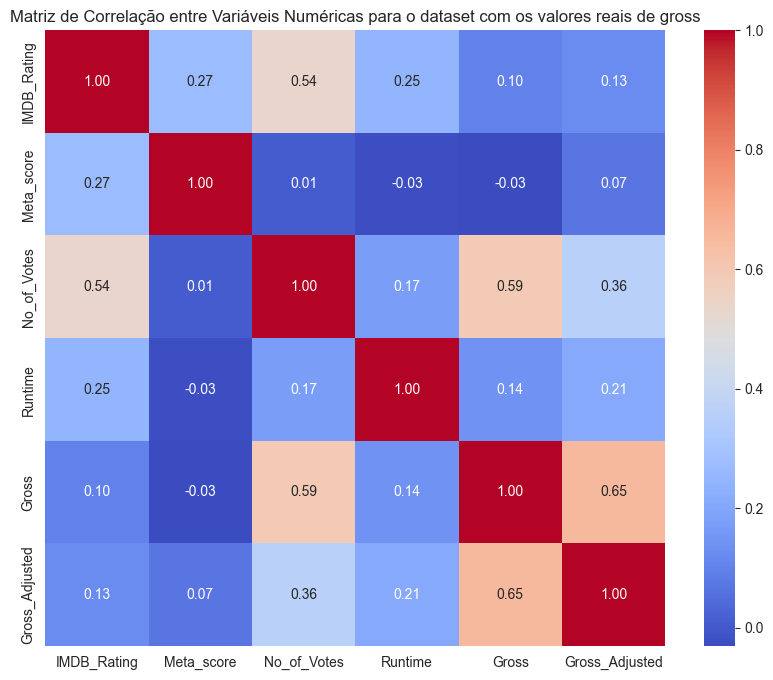

In [188]:
#Calcula a matriz de correlação para os dados com o gross real 
correlation_matrix = df_com_gross_real[numeric_cols].corr()

# Plota um heatmap para visualizar a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas para o dataset com os valores reais de gross')
plt.show()

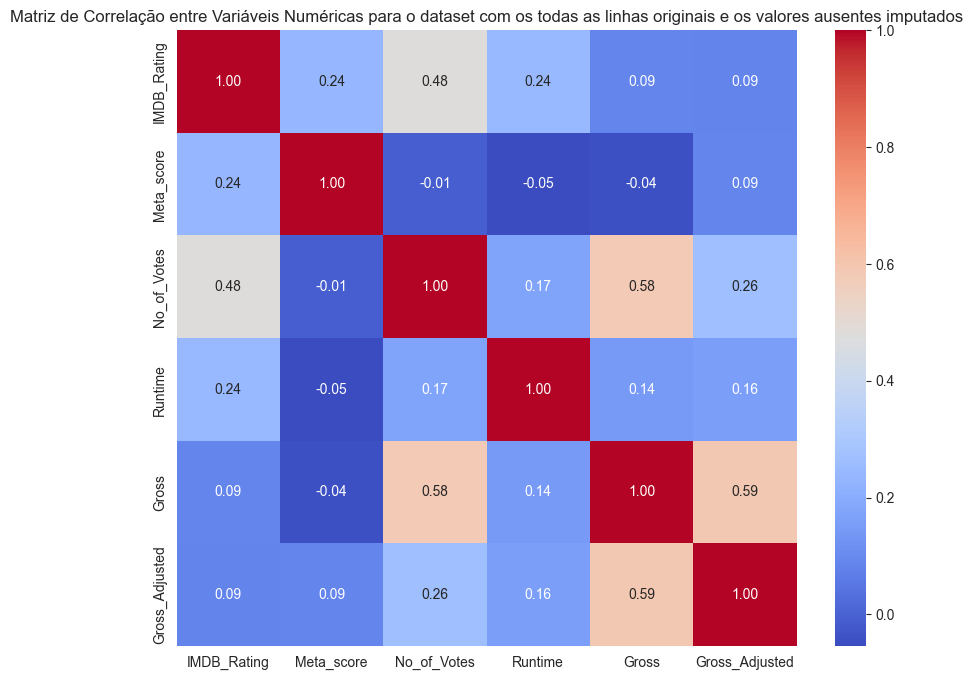

In [189]:
#Calcula a matriz de correlação dos dados completos com os dados ausentes de gross imputados pelo genero 
correlation_matrix = df_completo_futuro[numeric_cols].corr()

# Plota um heatmap para visualizar a correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis Numéricas para o dataset com os todas as linhas originais e os valores ausentes imputados')
plt.show()

Fica perceptivel que não há muita diferença entre usar o dataset sem os as linhas vazias de gross ou usar o dataset com todas as linha de gross, mas com os dados ausentes imputados.

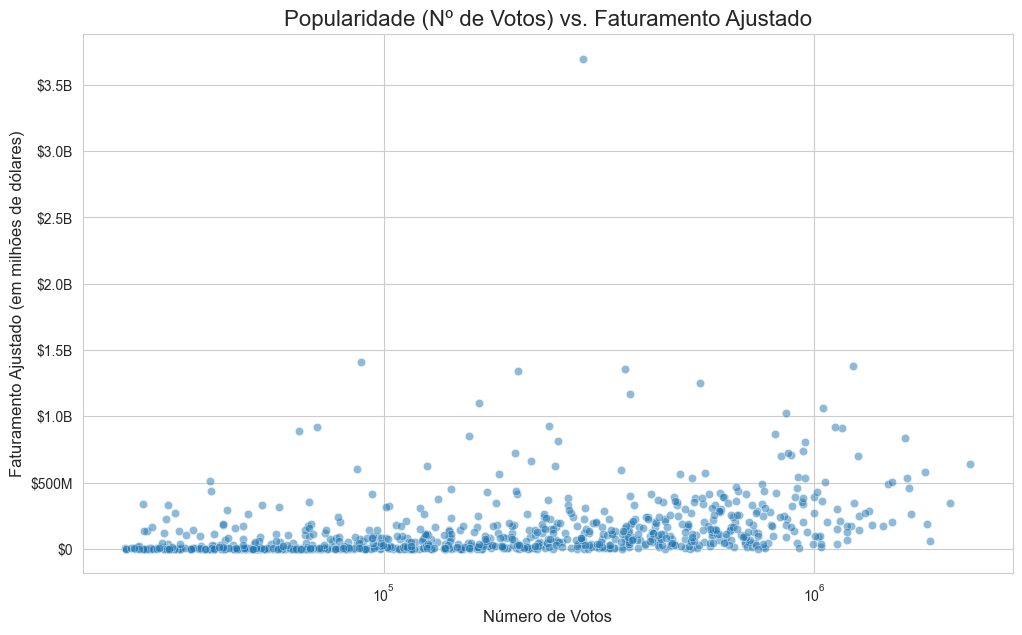

In [190]:
# Popularidade vs o Faturamento 

plt.figure(figsize=(12, 7))
ax = sns.scatterplot(data=df_com_gross_real, x='No_of_Votes', y='Gross_Adjusted', alpha=0.5)
ax.set_title('Popularidade (Nº de Votos) vs. Faturamento Ajustado', fontsize=16)
ax.set_xlabel('Número de Votos', fontsize=12)
ax.set_ylabel('Faturamento Ajustado (em milhões de dólares)', fontsize=12)
ax.yaxis.set_major_formatter(FuncFormatter(formatador_dinamico))
ax.set_xscale('log') # Escala log no eixo X para melhor visualização da densidade
plt.grid(True)
plt.show()

Podemos notar que não existe uma relação razoavel entre o numero de votos do filme e o seu faturamento, o que mostra que não intefere signitivamente para o faturamento.

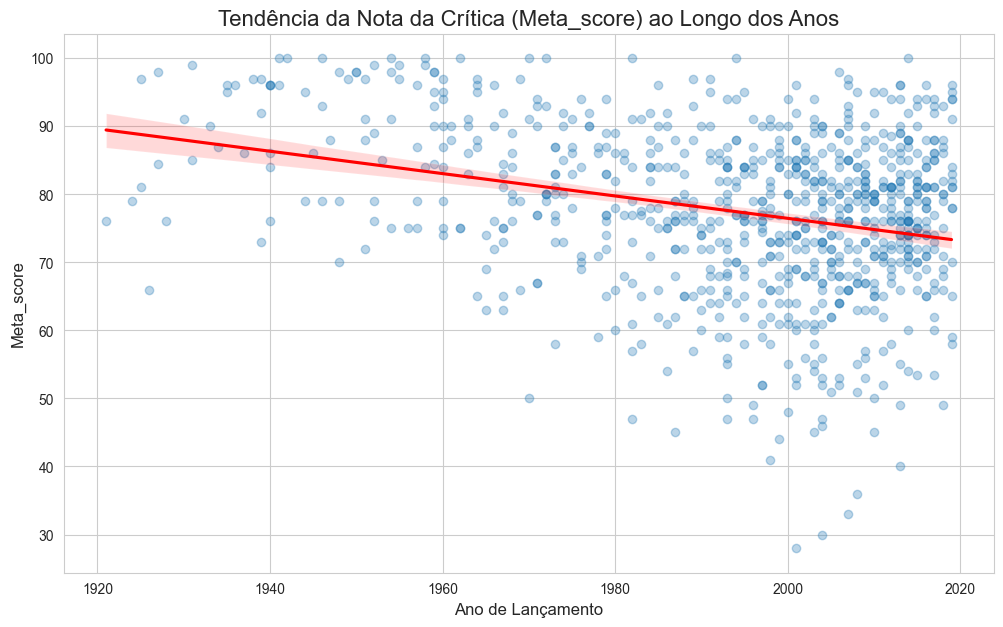

In [191]:
# Usamos o df_completo_imputado para ter a visão de todos os 1000 filmes
plt.figure(figsize=(12, 7))
ax = sns.regplot(data=df_com_gross_real, x='Released_Year', y='Meta_score',
                 scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
ax.set_title('Tendência da Nota da Crítica (Meta_score) ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Ano de Lançamento', fontsize=12)
ax.set_ylabel('Meta_score', fontsize=12)
plt.grid(True)
plt.show()

Nessa visualização notamos que a nota da critica teve uma pequena diminuição ao longo do tempo, provavelmete o publico se tonrou mais critico.

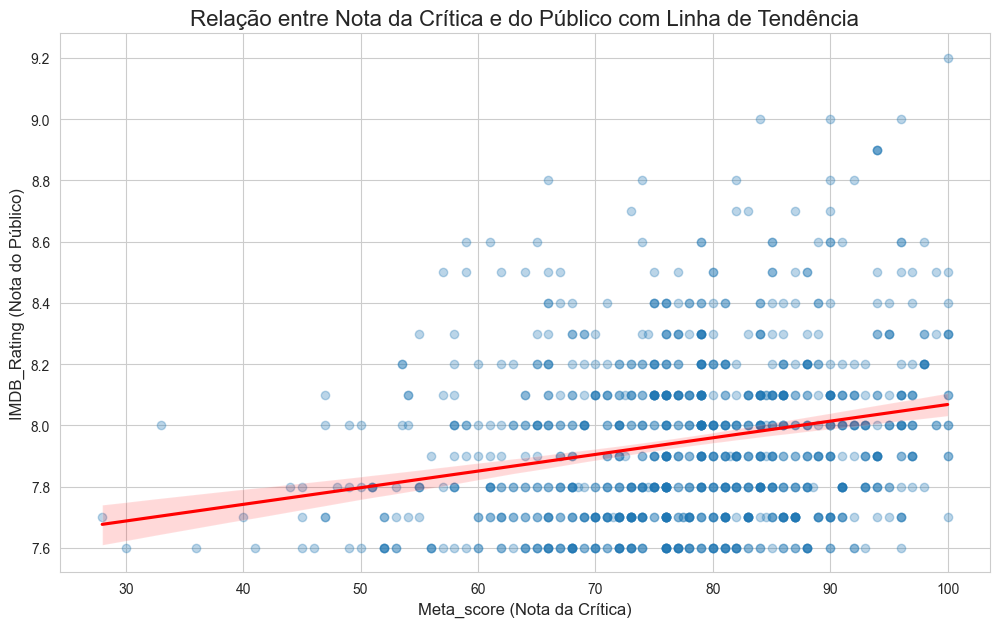

In [192]:
# Verificar a relação entre a nota da critica e a nota do publico 
plt.figure(figsize=(12, 7))
sns.regplot(data=df_completo_futuro,x='Meta_score', y='IMDB_Rating',
            scatter_kws={'alpha': 0.3},  # Deixa os pontos transparentes para ver a densidade
            line_kws={'color': 'red'})   # Deixa a linha de tendência vermelha
plt.title('Relação entre Nota da Crítica e do Público com Linha de Tendência', fontsize=16)
plt.xlabel('Meta_score (Nota da Crítica)', fontsize=12)
plt.ylabel('IMDB_Rating (Nota do Público)', fontsize=12)
plt.grid(True)
plt.show()

Existe um certa linearidade entre as notas do publico e as notas do IMDB, notas da critica maiores resultam em notas do publico maior

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\3643845290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_completo_futuro, y='Certificate_Harmonized',


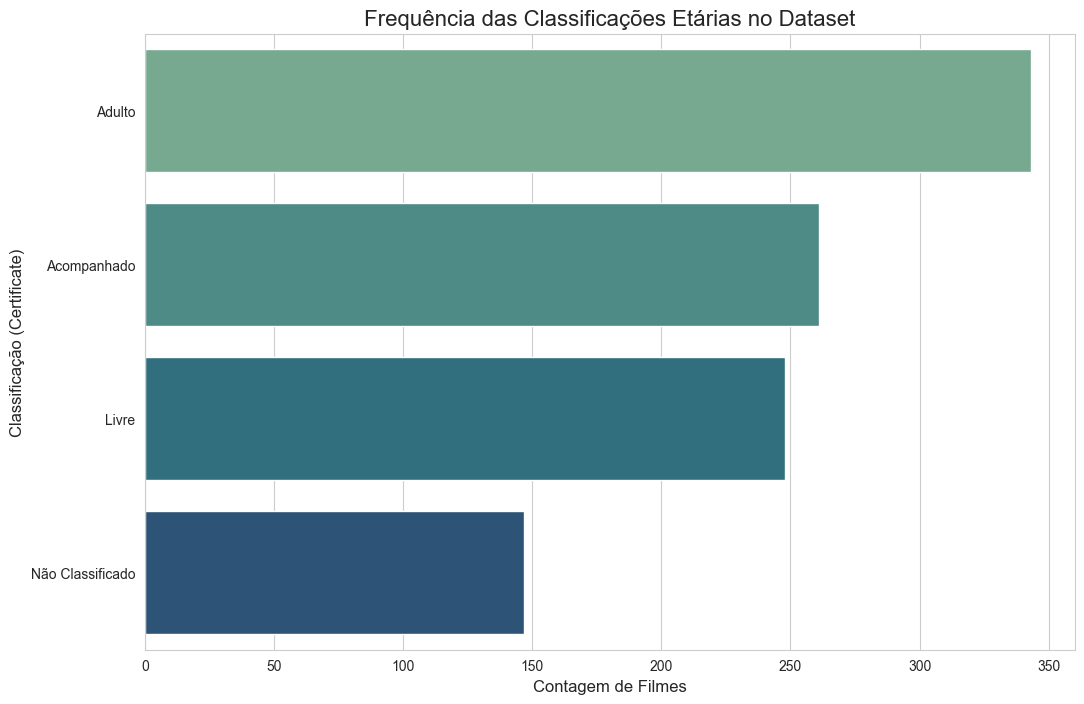

In [193]:
# Frequencia de 
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_completo_futuro, y='Certificate_Harmonized',
                   order=df_completo_futuro['Certificate_Harmonized'].value_counts().index, 
                   palette='crest')
ax.set_title('Frequência das Classificações Etárias no Dataset', fontsize=16)
ax.set_xlabel('Contagem de Filmes', fontsize=12)
ax.set_ylabel('Classificação (Certificate)', fontsize=12)
plt.show()

Aqui vimos que a maior frequência é de filmes classificados como adultos e acompanhados de um responsavel 

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\2591659312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_completo_futuro, y='Certificate_Harmonized', x='IMDB_Rating',


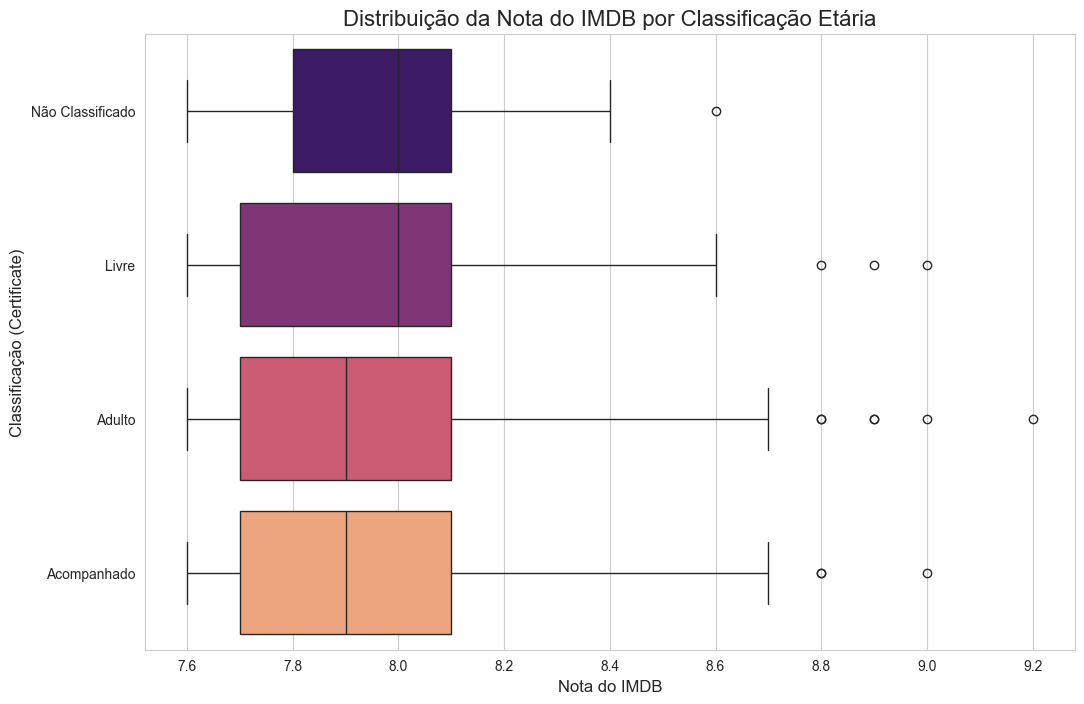

In [194]:
# Ordena as categorias pela mediana da nota para melhor visualização
order = df_completo_futuro.groupby('Certificate_Harmonized')['IMDB_Rating'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_completo_futuro, y='Certificate_Harmonized', x='IMDB_Rating', 
                 order=order, palette='magma')
ax.set_title('Distribuição da Nota do IMDB por Classificação Etária', fontsize=16)
ax.set_xlabel('Nota do IMDB', fontsize=12)
ax.set_ylabel('Classificação (Certificate)', fontsize=12)
plt.show()

Podemos notar que os filmes de classificassão etaria livre possuem uma media de nota no IMDM maior que as demais categorias 

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\622856703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_com_gross_real, y='Certificate_Harmonized', x='Gross_Adjusted',


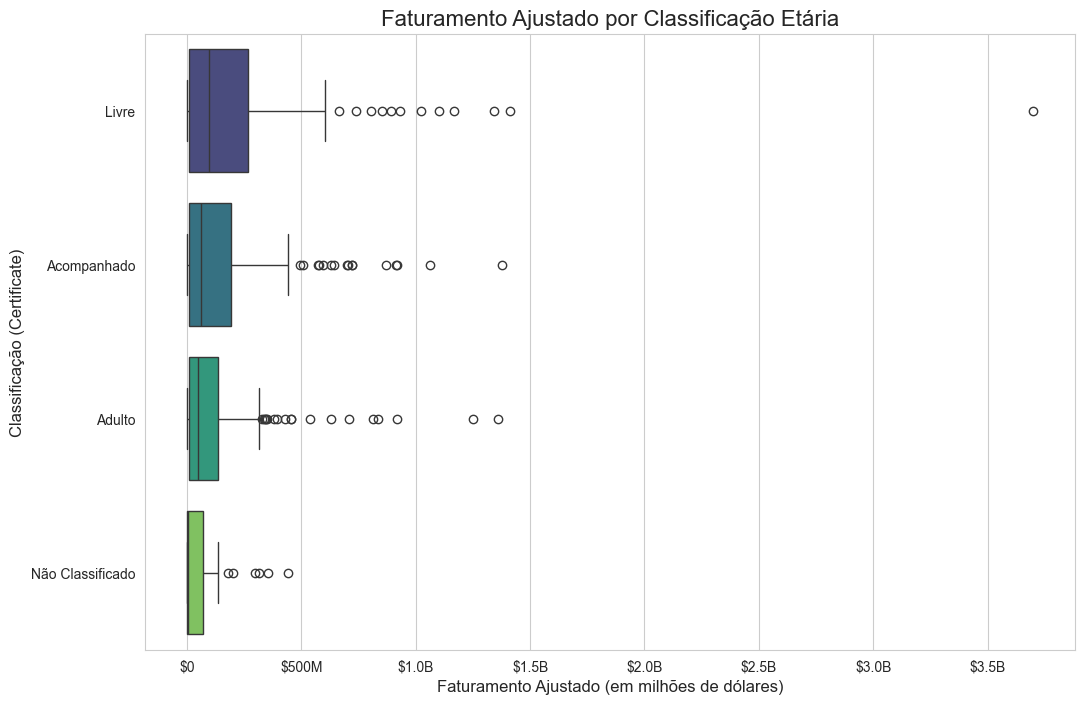

In [195]:
# Usando df_com_gross_real para análise financeira
# Ordena as categorias pela mediana do faturamento ajustado
order = df_com_gross_real.groupby('Certificate_Harmonized')['Gross_Adjusted'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_com_gross_real, y='Certificate_Harmonized', x='Gross_Adjusted', 
                 order=order, palette='viridis')

ax.xaxis.set_major_formatter(FuncFormatter(formatador_dinamico))

ax.set_title('Faturamento Ajustado por Classificação Etária', fontsize=16)
ax.set_xlabel('Faturamento Ajustado (em milhões de dólares)', fontsize=12)
ax.set_ylabel('Classificação (Certificate)', fontsize=12)
plt.show()

Vemos aqui que os filmes de classificação livre possuem um faturamento maior normalmente

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\181760918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres_by_gross.values, y=top_genres_by_gross.index, palette='plasma')


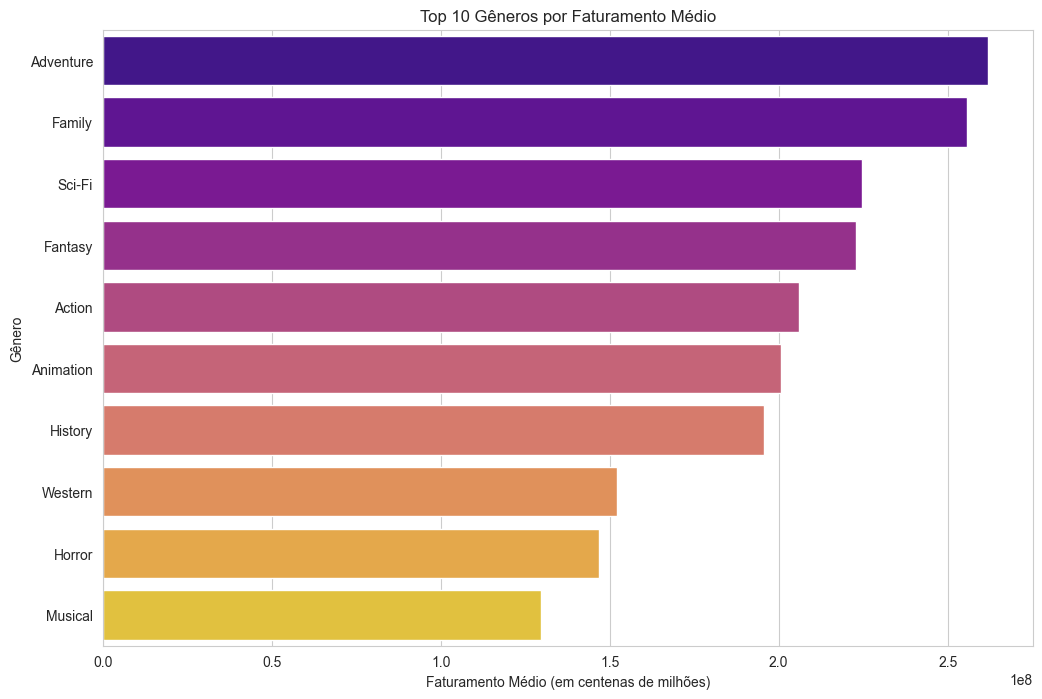

In [196]:
# Análise Bivariada: Relação entre Gênero e Faturamento/Nota

df_genre_exploded = df_com_gross_real.assign(Genre=df_com_gross_real['Genre'].str.split(', ')).explode('Genre')

# Faturamento médio por gênero (Top 10)
top_genres_by_gross = df_genre_exploded.groupby('Genre')['Gross_Adjusted'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres_by_gross.values, y=top_genres_by_gross.index, palette='plasma')
plt.title('Top 10 Gêneros por Faturamento Médio')
plt.xlabel('Faturamento Médio (em centenas de milhões)')
plt.ylabel('Gênero')
plt.show()

Notamos que o tipo de filme mais lucrativo é o de aventura e family

In [197]:

# Configura o formato de exibição para facilitar a leitura
pd.options.display.float_format = '{:,.2f}'.format

# Ordena o DataFrame pela coluna 'Gross_Adjusted' em ordem decrescente e pega os 10 primeiros
top_10_faturamento = df_com_gross_real.sort_values(by='Gross_Adjusted', ascending=False).head(10)

print("Top 10 Filmes por Faturamento Ajustado pela Inflação:")
display(top_10_faturamento[['Series_Title', 'Released_Year', 'Gross', 'Gross_Adjusted']])

Top 10 Filmes por Faturamento Ajustado pela Inflação:


,Series_Title,Released_Year,Gross,Gross_Adjusted
255,Gone with the Wind,1939,"198,676,459.00","3,697,041,544.13"
720,Fantasia,1940,"76,408,097.00","1,411,678,909.75"
26,Star Wars,1977,"322,740,140.00","1,378,172,729.22"
347,The Exorcist,1973,"232,906,145.00","1,357,628,628.63"
355,The Sound of Music,1965,"163,214,286.00","1,340,651,037.60"
343,Jaws,1975,"260,000,000.00","1,250,372,932.80"
568,E.T. the Extra-Terrestrial,1982,"435,110,554.00","1,166,958,239.48"
827,The Jungle Book,1967,"141,843,612.00","1,100,495,949.22"
535,Titanic,1997,"659,325,379.00","1,063,071,979.35"
387,Star Wars: Episode VII - The Force Awakens,2015,"936,662,225.00","1,022,790,108.83"


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\2697567238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='mako')


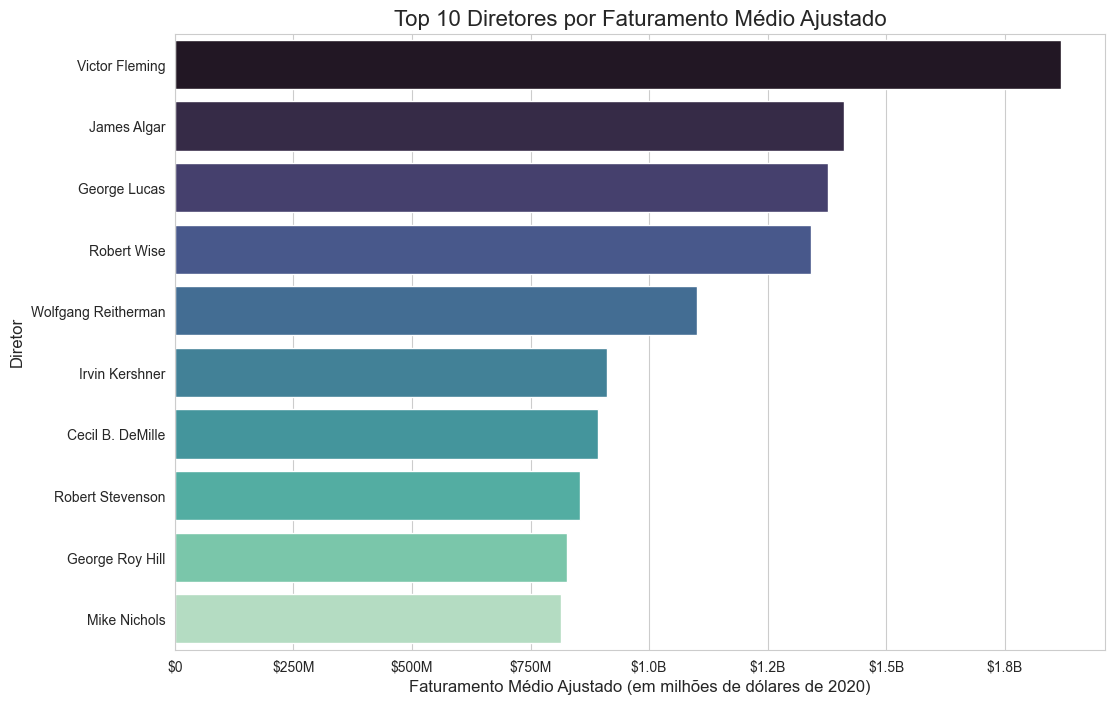

In [198]:
# Identificar quais diretores estão associados a um maior retorno financeiro.

# Calcula a média de faturamento ajustado por diretor e pega o top 10
top_10_directors = df_com_gross_real.groupby('Director')['Gross_Adjusted'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax1 = sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='mako')
ax1.set_title('Top 10 Diretores por Faturamento Médio Ajustado', fontsize=16)
ax1.set_xlabel('Faturamento Médio Ajustado (em milhões de dólares de 2020)', fontsize=12)
ax1.set_ylabel('Diretor', fontsize=12)

ax1.xaxis.set_major_formatter(FuncFormatter(formatador_dinamico))
plt.show()

Neste grafico vimos a lista de diretores e os seus respectivos faturamrentos ao longo de suas carreiras

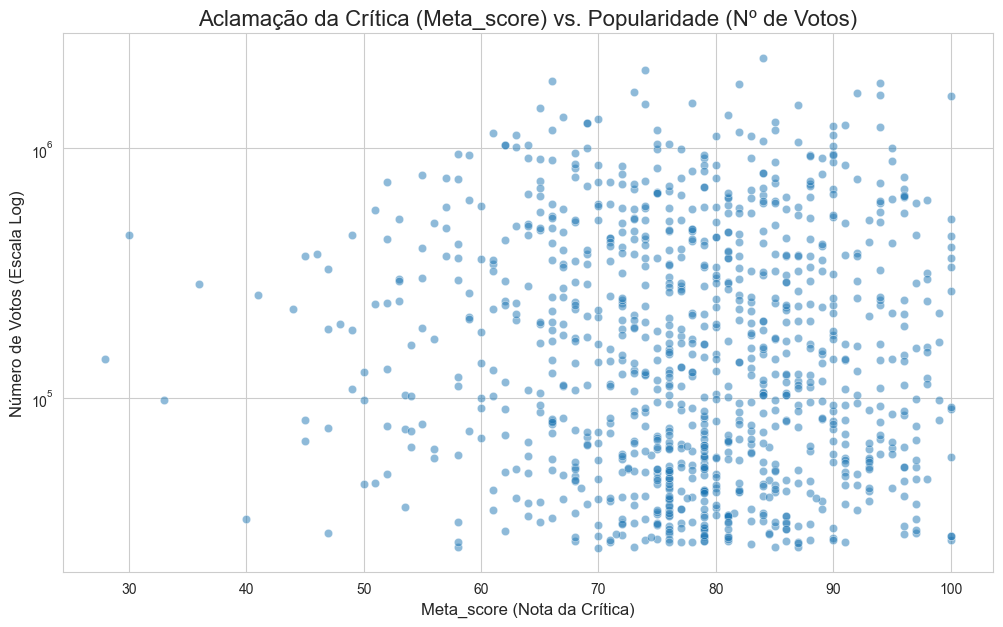

In [199]:
# Entender se filmes aclamados pela crítica (alto Meta_score) são
# também os mais populares (alto No_of_Votes).

plt.figure(figsize=(12, 7))
ax3 = sns.scatterplot(data=df_completo_futuro, x='Meta_score', y='No_of_Votes', alpha=0.5)
ax3.set_yscale('log') # Usar escala logarítmica no eixo Y para melhor visualização da densidade
ax3.set_title('Aclamação da Crítica (Meta_score) vs. Popularidade (Nº de Votos)', fontsize=16)
ax3.set_xlabel('Meta_score (Nota da Crítica)', fontsize=12)
ax3.set_ylabel('Número de Votos (Escala Log)', fontsize=12)
plt.grid(True)
plt.show()

Como é visto na matriz de correlção não existe uma correlação entre a nota da critica e o numero de votos. 

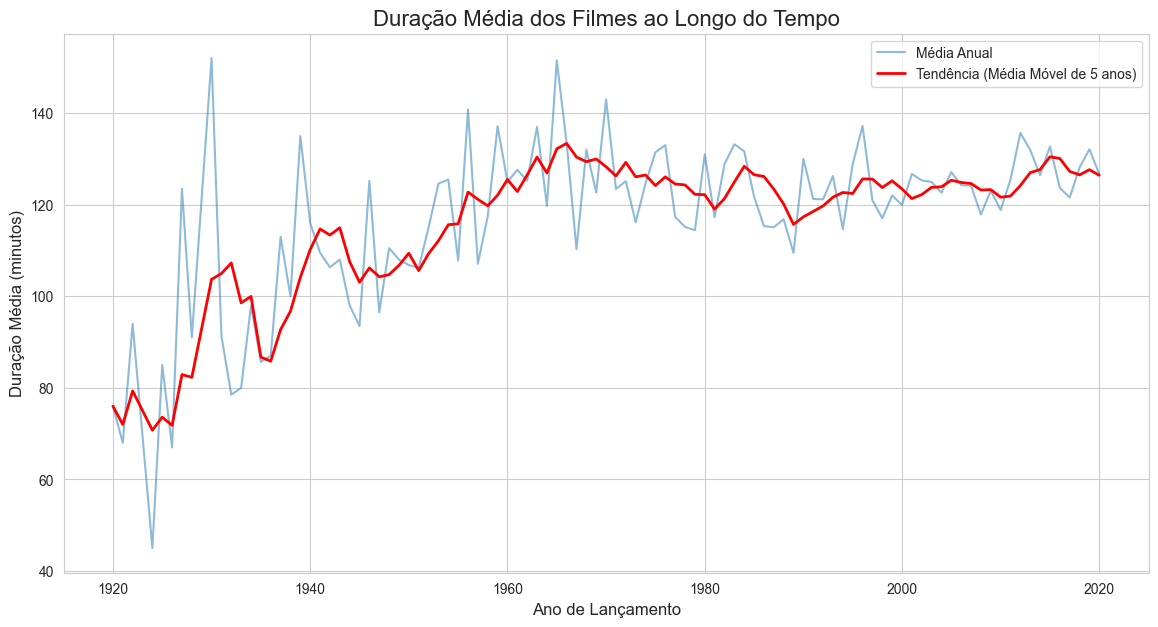

In [200]:
# Verificar se existe uma tendência de aumento ou diminuição na
# duração dos filmes ao longo dos anos.

# Calcula a duração média por ano
runtime_over_time = df_completo_futuro.groupby('Released_Year')['Runtime'].mean().reset_index()
# Adiciona uma média móvel para suavizar a linha e identificar a tendência
runtime_over_time['rolling_avg'] = runtime_over_time['Runtime'].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(14, 7))
ax4 = sns.lineplot(data=runtime_over_time, x='Released_Year', y='Runtime', label='Média Anual', alpha=0.5)
sns.lineplot(data=runtime_over_time, x='Released_Year', y='rolling_avg', label='Tendência (Média Móvel de 5 anos)', color='red', lw=2, ax=ax4)
ax4.set_title('Duração Média dos Filmes ao Longo do Tempo', fontsize=16)
ax4.set_xlabel('Ano de Lançamento', fontsize=12)
ax4.set_ylabel('Duração Média (minutos)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

É notavel que houve uma estabilização da media de tempo de duração dos filmes após a de 1960.

Top 10 Gêneros Mais Comuns:
Genre
Drama        596
Comedy       191
Crime        171
Adventure    170
Action       156
Thriller     110
Romance      107
Biography     96
Mystery       84
Animation     67
Name: count, dtype: int64


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\3505716406.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')


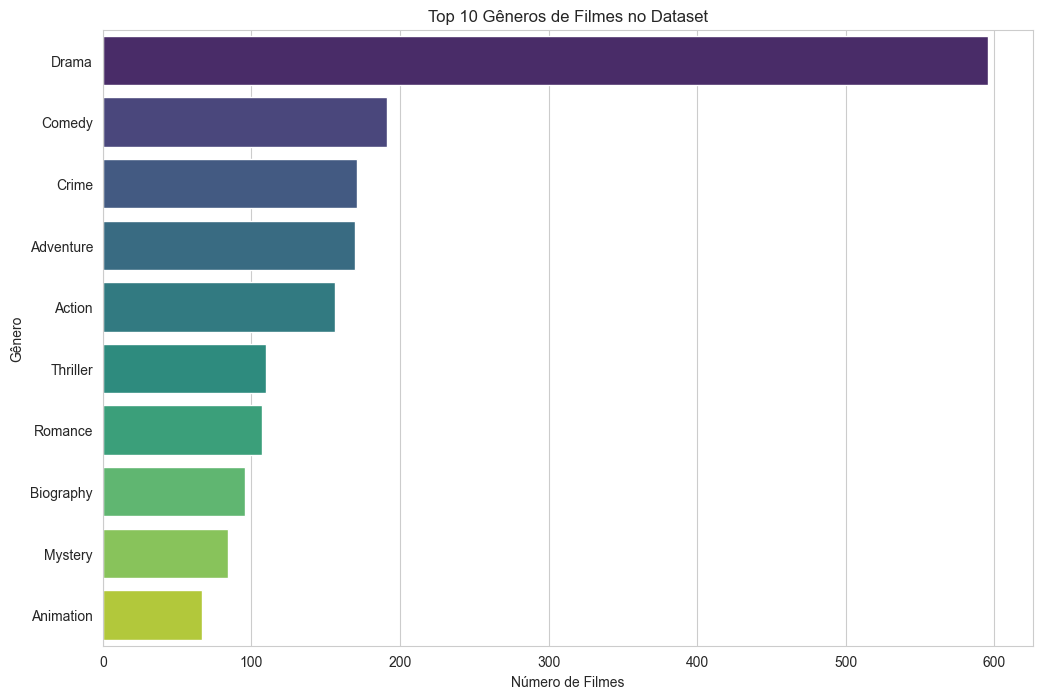

In [201]:
# Como um filme pode ter múltiplos gêneros, separamos e contamos cada um
genre_counts = df_com_gross_real['Genre'].str.split(', ').explode().value_counts()

print("Top 10 Gêneros Mais Comuns:")
print(genre_counts.head(10))

# Visualiza a contagem dos 10 gêneros mais comuns
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette='viridis')
plt.title('Top 10 Gêneros de Filmes no Dataset')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()

Nesse grafico vemos que o gênero de drama é o mais comum nos filmes o que pode gerar um desbalanceamento quando quisermos inferir o gênero

# **Perguntas do Desafio**

### A): Qual filme você recomendaria para uma pessoa que você não conhece?
Metodologia: A melhor recomendação para um desconhecido é um "porto seguro": um filme que seja aclamado pela crítica (alta nota) e extremamente popular (muitos votos).
Isso minimiza a chance de a pessoa não gostar.

In [202]:
# Filtra por filmes com nota muito alta e um grande número de votos
safe_bet_filter = (df_completo_futuro['IMDB_Rating'] >= 8.8) & (df_completo_futuro['No_of_Votes'] > 1500000)
recomendacao_df = df_completo_futuro[safe_bet_filter].sort_values(by='No_of_Votes', ascending=False)

# Pega o filme no topo da lista
filme_recomendado = recomendacao_df.iloc[0]

print("Filme recomendado:")
print(filme_recomendado[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Genre']])


Filme recomendado:
Series_Title         The Dark Knight
IMDB_Rating                     9.00
No_of_Votes                  2303232
Genre           Action, Crime, Drama
Name: 1, dtype: object


Portanto, o filme que seria recomendado para alguém que não conheço seria **The Dark Knight**

### B): Quais são os principais fatores de faturamento?


In [203]:
# Correlação com outras variáveis
correlacao_faturamento = df_com_gross_real.select_dtypes(include=np.number).corr()['Gross_Adjusted'].sort_values(ascending=False)
print("\n Correlação com outras variáveis:")
print(correlacao_faturamento)

# Gênero
top_generos_faturamento = df_com_gross_real.assign(Genre=df_com_gross_real['Genre'].str.split(', ')).explode('Genre')\
                                           .groupby('Genre')['Gross_Adjusted'].median().sort_values(ascending=False)
print("\n Mediana de Faturamento Ajustado por Gênero (Top 5):")
print(top_generos_faturamento.head())

# Classificação Etária
faturamento_por_classificacao = df_com_gross_real.groupby('Certificate_Harmonized')['Gross_Adjusted'].median().sort_values(ascending=False)
print("\nFator 3: Mediana de Faturamento por Classificação Harmonizada:")
print(faturamento_por_classificacao)


 Correlação com outras variáveis:
Gross_Adjusted    1.00
Gross             0.65
No_of_Votes       0.36
Runtime           0.21
IMDB_Rating       0.13
Meta_score        0.07
Released_Year    -0.14
Year             -0.14
CPI              -0.17
Name: Gross_Adjusted, dtype: float64

 Mediana de Faturamento Ajustado por Gênero (Top 5):
Genre
Adventure   214,250,858.19
Sci-Fi      139,512,237.99
Action      132,880,141.10
Western     116,142,513.82
Animation    90,823,106.32
Name: Gross_Adjusted, dtype: float64

Fator 3: Mediana de Faturamento por Classificação Harmonizada:
Certificate_Harmonized
Livre              96,701,414.59
Acompanhado        61,192,929.92
Adulto             46,255,023.62
Não Classificado    3,670,049.96
Name: Gross_Adjusted, dtype: float64


Baicamente os principais fatores para um filme ter um bom faturamento é ele ser de classificação livre e estar dentro do gênero de aventura ou Sci-Fi

### C.1) Quais insights podem ser tirados com a coluna Overview?

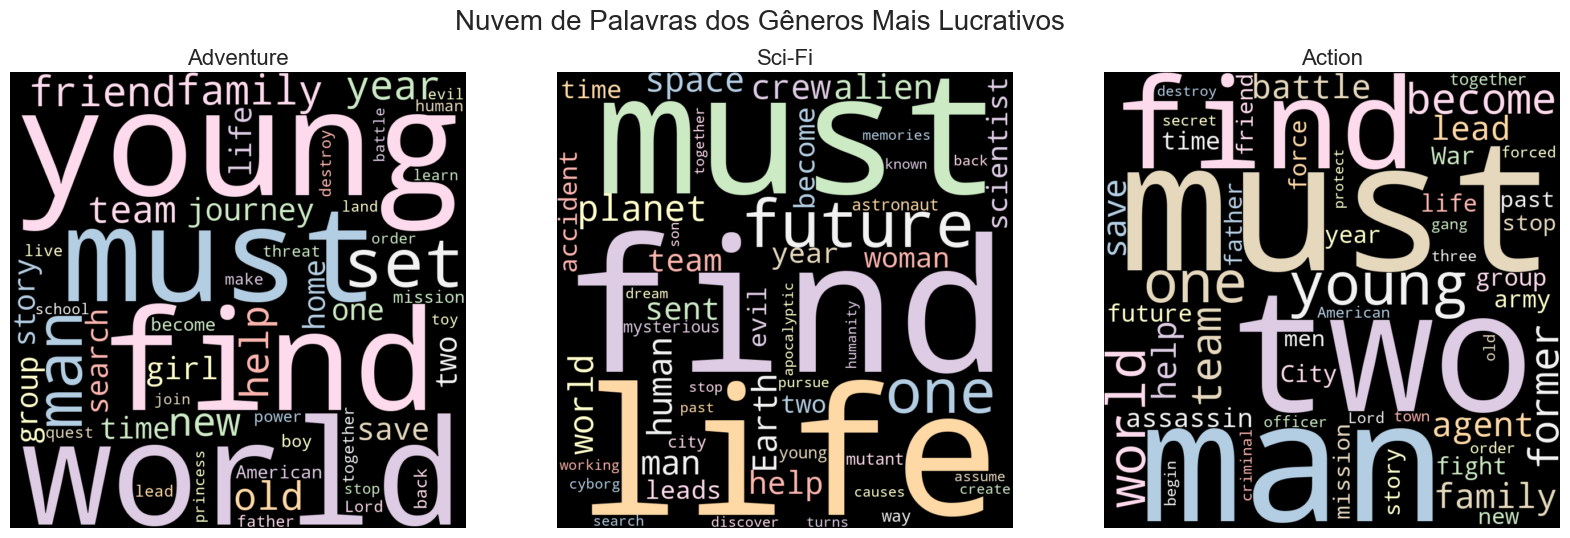

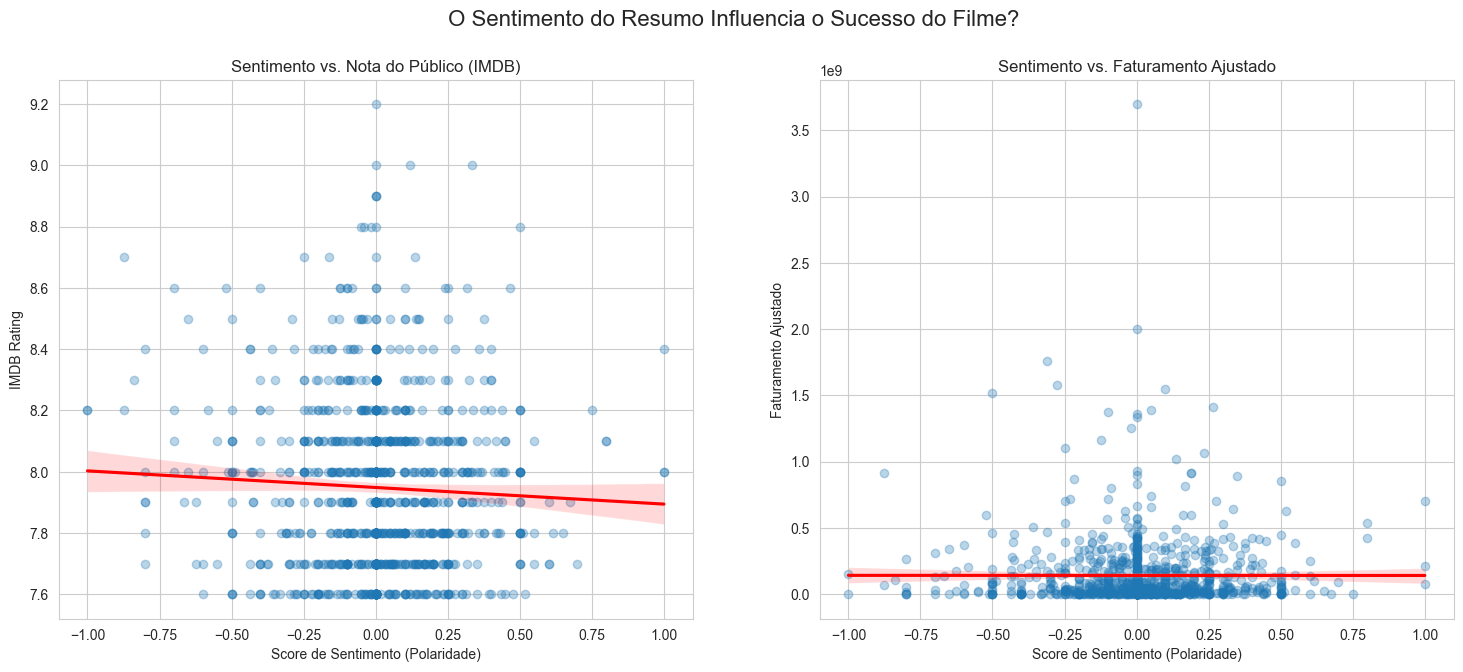

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\594338507.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_top_genres_full, y='Genre', x='avg_word_length', order=order, palette='coolwarm')


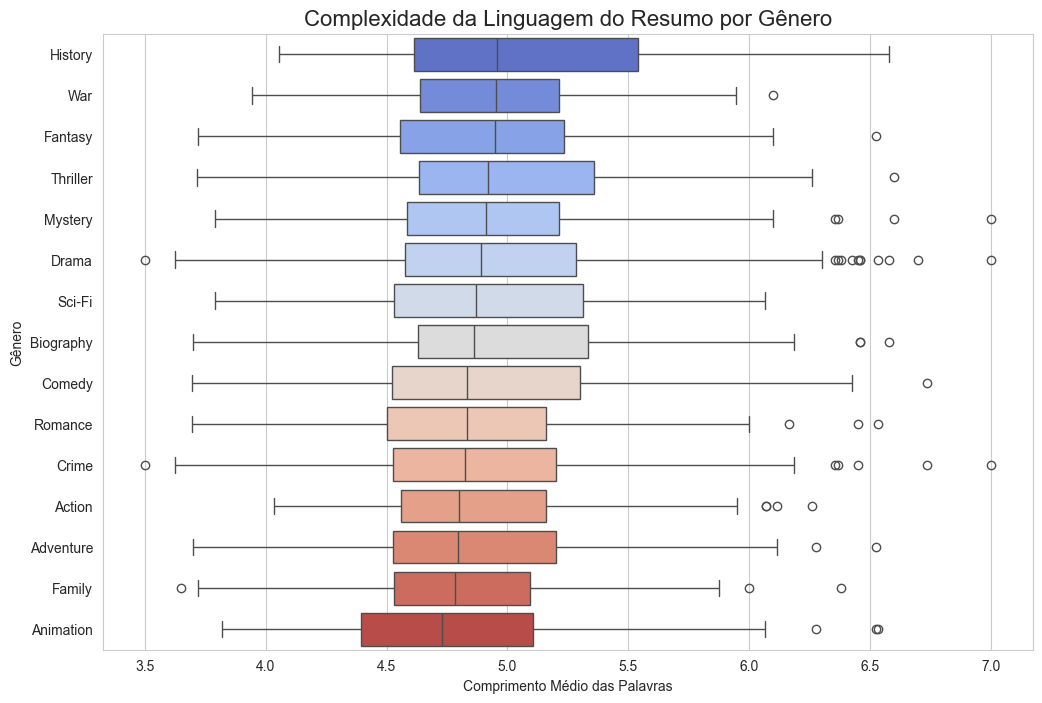

In [204]:
# Comparação entre os temas mais rentaveis

df_exploded_gross = df_com_gross_real.assign(Genre=df_com_gross_real['Genre'].str.split(', ')).explode('Genre')
top_3_genres = df_exploded_gross.groupby('Genre')['Gross_Adjusted'].median().nlargest(3).index

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Nuvem de Palavras dos Gêneros Mais Lucrativos', fontsize=20)

for i, genre in enumerate(top_3_genres):
    # Filtra os filmes do gênero específico (adicionado na=False para segurança)
    text = " ".join(overview for overview in df_completo_futuro[df_completo_futuro['Genre'].str.contains(genre, na=False)].Overview)
    
    # Gera a nuvem de palavras
    wordcloud = WordCloud(max_words=50, background_color="black", colormap='Pastel1', width=800, height=800).generate(text)
    
    # Plota a nuvem no subplot correspondente
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(genre, fontsize=16)
    axes[i].axis("off")

plt.show()


# Sentimentos e sua  relação com o sucesso 
if 'sentiment_score' not in df_completo_futuro.columns:
    df_completo_futuro['sentiment_score'] = df_completo_futuro['Overview'].apply(lambda x: TextBlob(x).sentiment.polarity)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('O Sentimento do Resumo Influencia o Sucesso do Filme?', fontsize=16)

sns.regplot(data=df_completo_futuro, x='sentiment_score', y='IMDB_Rating', ax=axes[0],
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
axes[0].set_title('Sentimento vs. Nota do Público (IMDB)')
axes[0].set_xlabel('Score de Sentimento (Polaridade)')
axes[0].set_ylabel('IMDB Rating')

sns.regplot(data=df_completo_futuro, x='sentiment_score', y='Gross_Adjusted', ax=axes[1],
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
axes[1].set_title('Sentimento vs. Faturamento Ajustado')
axes[1].set_xlabel('Score de Sentimento (Polaridade)')
axes[1].set_ylabel('Faturamento Ajustado')
plt.show()



# Complexidade da linguagem por genero 

df_completo_futuro['avg_word_length'] = df_completo_futuro['Overview'].apply(lambda x: np.mean([len(word) for word in x.split()]))

df_exploded_full = df_completo_futuro.assign(Genre=df_completo_futuro['Genre'].str.split(', ')).explode('Genre')
top_15_genres = df_exploded_full['Genre'].value_counts().nlargest(15).index
df_top_genres_full = df_exploded_full[df_exploded_full['Genre'].isin(top_15_genres)]

order = df_top_genres_full.groupby('Genre')['avg_word_length'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_top_genres_full, y='Genre', x='avg_word_length', order=order, palette='coolwarm')
ax.set_title('Complexidade da Linguagem do Resumo por Gênero', fontsize=16)
ax.set_xlabel('Comprimento Médio das Palavras')
ax.set_ylabel('Gênero')
plt.show()

Vemos aqui que os filmes mais lucrativos são aqueles que tem um comptimento menor das palvras o que implica em resumos mais simples para o publico 

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\322329525.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=top_bigrams_df, palette='cividis')


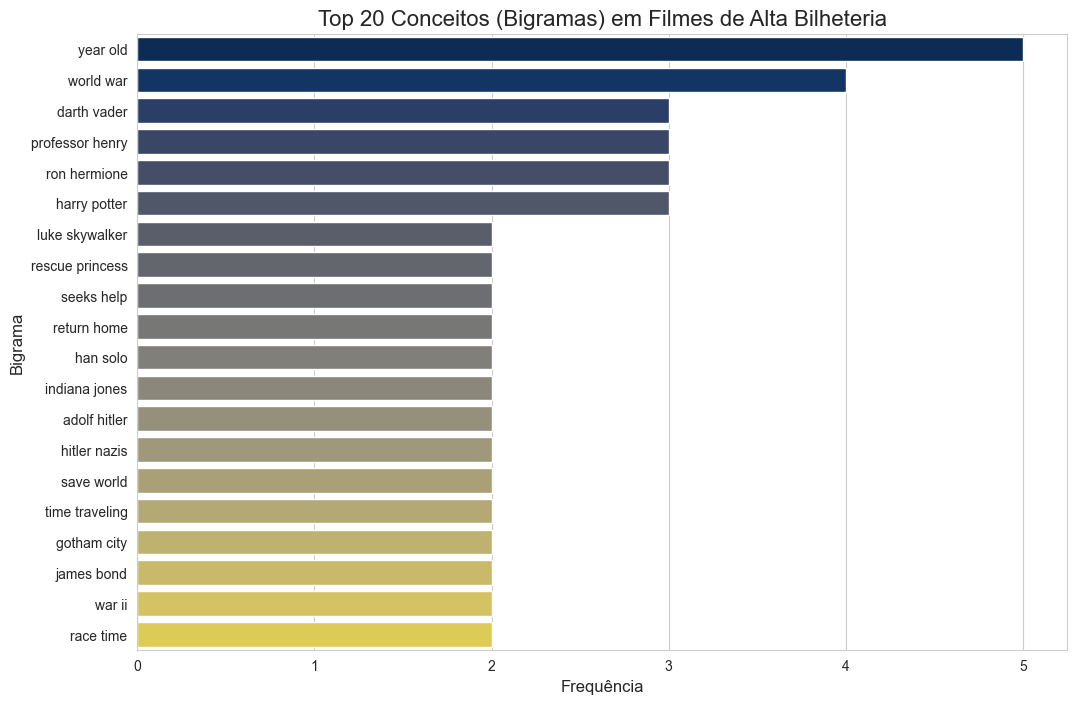

In [205]:
from sklearn.feature_extraction.text import CountVectorizer

# Usando os 100 filmes de maior faturamento 
top_100_gross_movies = df_com_gross_real.sort_values(by='Gross_Adjusted', ascending=False).head(100)
overviews = top_100_gross_movies['Overview']

# Configura o vetorizador para encontrar bigramas (pares de palavras) e remover stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(overviews)

# Soma as ocorrências de cada bigrama
bigram_counts = X.sum(axis=0)
words_freq = [(word, bigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

# Prepara os dados para o gráfico
top_bigrams_df = pd.DataFrame(words_freq, columns=['bigram', 'count'])

# Visualização
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='bigram', data=top_bigrams_df, palette='cividis')
plt.title('Top 20 Conceitos (Bigramas) em Filmes de Alta Bilheteria', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Bigrama', fontsize=12)
plt.show()


As palavras mais importantes para cada Tópico descoberto:
Tópico #0: man | life | small | american | war | battle | time | leads | city | world
Tópico #1: father | life | son | young | years | mother | daughter | story | woman | help
Tópico #2: man | young | life | love | finds | girl | world | people | takes | woman
Tópico #3: new | young | old | year | family | woman | friends | world | york | friend
Tópico #4: war | world | team | high | ii | school | german | time | day | detective

Cada filme foi associado a um tópico temático.


C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\3831010390.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_completo_futuro, y='Topic', x='IMDB_Rating', ax=axes[0], order=order_imdb, palette='plasma')
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_18780\3831010390.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_completo_futuro, y='Topic', x='Gross_Adjusted', ax=axes[1], order=order_gross, palette='viridis')


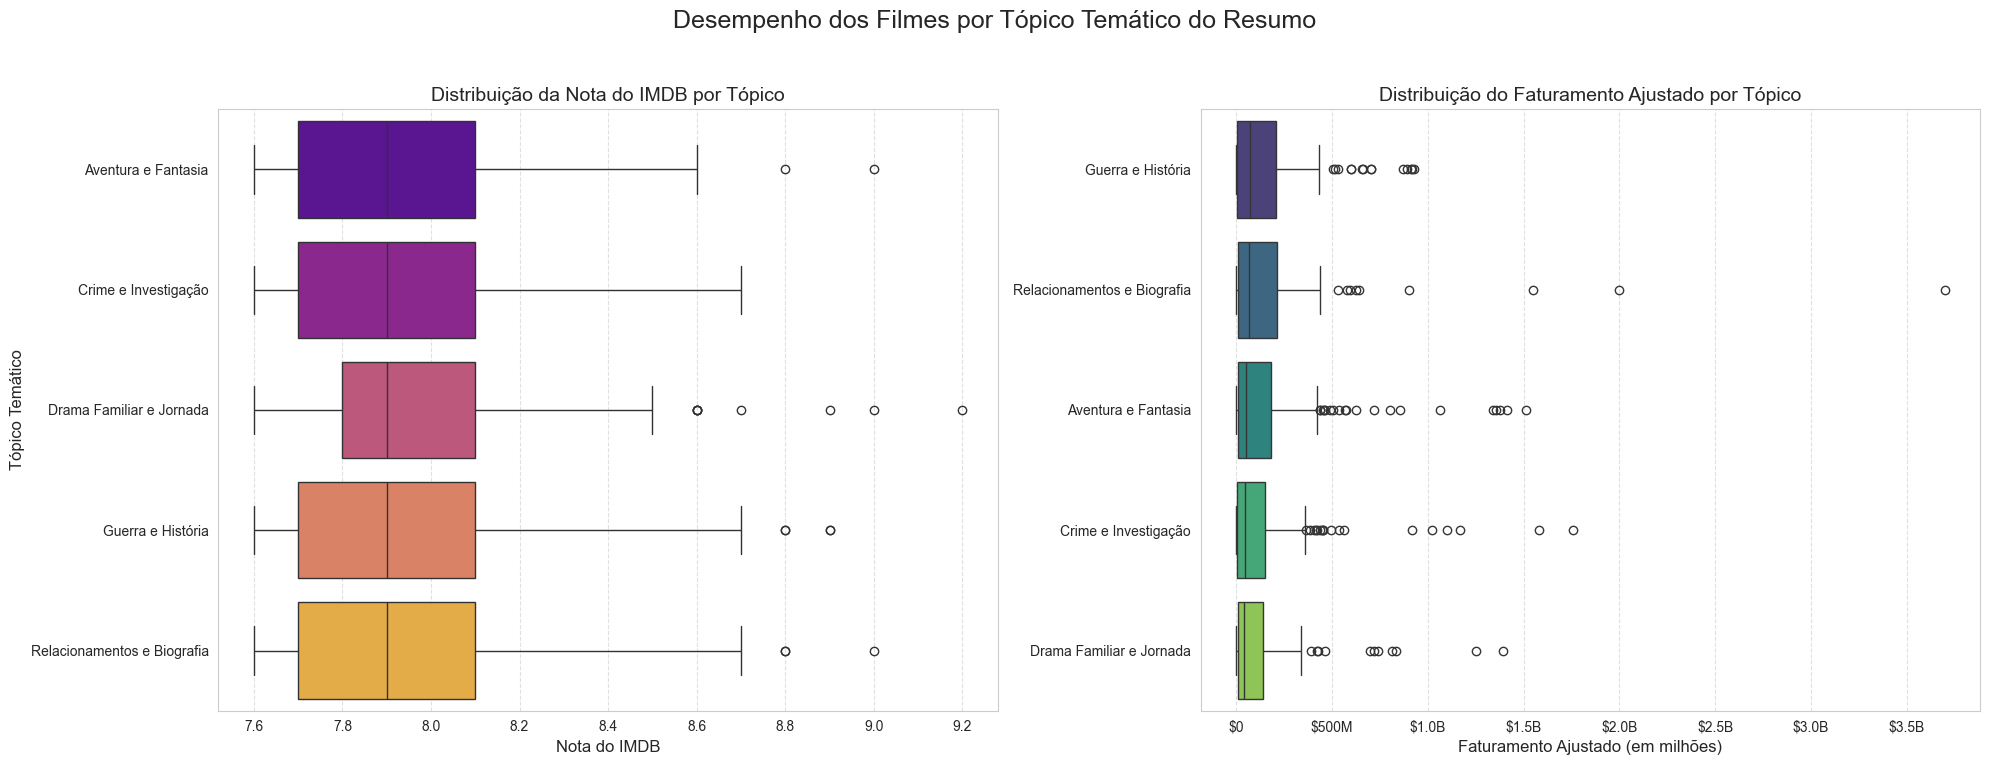

In [206]:

# Converte todos os resumos em uma matriz numérica de contagem de palavras
vectorizer_lda = CountVectorizer(stop_words='english', max_features=1000, max_df=0.8, min_df=5)
X_lda = vectorizer_lda.fit_transform(df_completo_futuro['Overview'])

# Cria e treina o modelo LDA para encontrar 5 tópicos
# n_components é o número de tópicos que queremos encontrar
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_lda)



# Função para exibir as palavras mais importantes de cada tópico
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Tópico #{topic_idx}: "
        message += " | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("\nAs palavras mais importantes para cada Tópico descoberto:")
print_top_words(lda, vectorizer_lda.get_feature_names_out(), 10)

# Com base nas palavras acima, criamos um mapa para nomear os tópicos
# Esta é uma etapa de interpretação manual
topic_labels = {
    0: "Relacionamentos e Biografia",
    1: "Drama Familiar e Jornada",
    2: "Crime e Investigação",
    3: "Aventura e Fantasia",
    4: "Guerra e História"
}

# Atribui o tópico mais provável a cada filme em uma nova coluna
topic_results = lda.transform(X_lda)
df_completo_futuro['Topic_Num'] = np.argmax(topic_results, axis=1)
df_completo_futuro['Topic'] = df_completo_futuro['Topic_Num'].map(topic_labels)

print("\nCada filme foi associado a um tópico temático.")




fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Desempenho dos Filmes por Tópico Temático do Resumo', fontsize=18)

# Tópico vs. Nota do IMDB
order_imdb = df_completo_futuro.groupby('Topic')['IMDB_Rating'].median().sort_values(ascending=False).index
sns.boxplot(data=df_completo_futuro, y='Topic', x='IMDB_Rating', ax=axes[0], order=order_imdb, palette='plasma')
axes[0].set_title('Distribuição da Nota do IMDB por Tópico', fontsize=14)
axes[0].set_xlabel('Nota do IMDB', fontsize=12)
axes[0].set_ylabel('Tópico Temático', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)


# Tópico vs. Faturamento Ajustado
order_gross = df_completo_futuro.groupby('Topic')['Gross_Adjusted'].median().sort_values(ascending=False).index
sns.boxplot(data=df_completo_futuro, y='Topic', x='Gross_Adjusted', ax=axes[1], order=order_gross, palette='viridis')

def millions_formatter(x, pos): return f'${x / 1e6:.0f}M'
axes[1].xaxis.set_major_formatter(FuncFormatter(formatador_dinamico))
axes[1].set_title('Distribuição do Faturamento Ajustado por Tópico', fontsize=14)
axes[1].set_xlabel('Faturamento Ajustado (em milhões)', fontsize=12)
axes[1].set_ylabel('') # Remove o label Y para não repetir
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## C.2) É possível inferir o gênero do filme a partir dessa coluna(overview)? 

In [207]:
# Verificando a frenquência por genero no dataset 
genre_counts = df_completo_futuro.assign(Genre=df_completo_futuro['Genre'].str.split(', ')).explode('Genre')['Genre'].value_counts(normalize=True) * 100

print("Frequência dos Gêneros no Dataset (%):")
print(genre_counts.head(10))

Frequência dos Gêneros no Dataset (%):
Genre
Drama       28.46
Comedy       9.17
Crime        8.23
Adventure    7.72
Action       7.44
Thriller     5.39
Romance      4.92
Biography    4.29
Mystery      3.90
Animation    3.23
Name: proportion, dtype: float64


In [208]:
# Inferencia de gênero 

# Preparação dos Dados
X = df_completo_futuro['Overview']
y_genres_list = df_completo_futuro['Genre'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y_genres_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_df = pd.DataFrame(y_test, index=X_test.index, columns=mlb.classes_)

# Criação e Treinamento do Pipeline
nlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')))
])
nlp_pipeline.fit(X_train, y_train)

# Demonstração com 10 Exemplos 
print("\nDemonstração da Previsão com 10 Exemplos")

amostras_aleatorias = X_test.sample(n=10, random_state=42)

for i, (indice_exemplo, overview_exemplo) in enumerate(amostras_aleatorias.items()):
    generos_reais_bin = y_test_df.loc[indice_exemplo].values
    
    # Modelo de predição
    generos_previstos_bin = nlp_pipeline.predict([overview_exemplo])
    
    # Converte a saída binária de volta para texto
    generos_reais = mlb.inverse_transform(np.array([generos_reais_bin]))
    generos_previstos = mlb.inverse_transform(generos_previstos_bin)
    
    # Imprime a comparação
    print(f"\nEXEMPLO {i+1}")
    print(f"Filme (índice): {indice_exemplo}")
    print(f"Resumo (Overview): \n'{overview_exemplo}'")
    print(f"Gêneros Reais:           {generos_reais[0]}")
    print(f"Gêneros Previstos pelo Modelo: {generos_previstos[0]}")


Demonstração da Previsão com 10 Exemplos

EXEMPLO 1
Filme (índice): 88
Resumo (Overview): 
'A married couple are faced with a difficult decision - to improve the life of their child by moving to another country or to stay in Iran and look after a deteriorating parent who has Alzheimer's disease.'
Gêneros Reais:           ('Drama',)
Gêneros Previstos pelo Modelo: ('Drama', 'Romance')

EXEMPLO 2
Filme (índice): 70
Resumo (Overview): 
'A former Prohibition-era Jewish gangster returns to the Lower East Side of Manhattan over thirty years later, where he once again must confront the ghosts and regrets of his old life.'
Gêneros Reais:           ('Crime', 'Drama')
Gêneros Previstos pelo Modelo: ('Biography', 'Drama')

EXEMPLO 3
Filme (índice): 595
Resumo (Overview): 
'When a new toy called "Forky" joins Woody and the gang, a road trip alongside old and new friends reveals how big the world can be for a toy.'
Gêneros Reais:           ('Adventure', 'Animation', 'Comedy')
Gêneros Previstos pelo

Vemos com a aplicação simples de um modelo que é possivel prever o genenro com base no overview, mas como a maioria dos genernos está em drma o modelo tende a selecionar mais o genenro de drama, após um balanceamento os resultados foram mais satisfatorios. Futuramente poderiam ser usados modelos mais robustos para as previsões. 

# **Previsão**

O problema de prever a nota do IMDB é um problema de Regressão pois o alvo (`IMDB_Rating`) é uma variável numérica contínua.

In [209]:
target = 'IMDB_Rating'
# Usamos as features mais relevantes, incluindo a 'Certificate_Harmonized'.
# Excluímos 'Certificate' e 'Genre' originais.
features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross_Adjusted', 'Certificate_Harmonized']

X = df_completo_futuro[features]
y = df_completo_futuro[target]

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos em {len(X_train)} para treino e {len(X_test)} para teste.")

Dados divididos em 799 para treino e 200 para teste.


Dividimos os dados em 80% para treinamento e 20% para teste. As features escolhidas foram aquelas que tiveram melhores desempenhos com base na analise preditiva.

In [210]:
# Identifica automaticamente as colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Pipeline para tratar features numéricas: preenche NaNs com a mediana e padroniza a escala
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para tratar features categóricas: preenche NaNs com o valor mais frequente e aplica One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Junta os dois pipelines em um único pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Definimos os modelos a serem treinados e testados para a previsão do IMDB

In [211]:

# Pré-processa os dados de treino e teste uma vez
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Definindo os modelos e dicionarios de parametros

modelos = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Dicionário com as grades de parâmetros para cada modelo a ser otimizado
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'min_samples_leaf': [2, 4]
    },
    "SVR": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    }
}

In [212]:
# Otimização e avaliação

resultados = []

for nome, modelo in modelos.items():
    print(f"\nProcessando modelo: {nome}...")
    
    # Se o modelo não tem uma grade de parâmetros, apenas treina e avalia
    if nome not in param_grids:
        modelo.fit(X_train_processed, y_train)
        best_params = "N/A"
        best_estimator = modelo
    else:
        # Se tem uma grade, executa o GridSearchCV
        grid_search = GridSearchCV(
            estimator=modelo,
            param_grid=param_grids[nome],
            scoring='neg_root_mean_squared_error',
            cv=5,
            verbose=0,
            n_jobs=-1
        )
        grid_search.fit(X_train_processed, y_train)
        best_params = grid_search.best_params_
        best_estimator = grid_search.best_estimator_
        print(f"  Melhores parâmetros: {best_params}")

    # Avaliação final no conjunto de teste
    y_pred = best_estimator.predict(X_test_processed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    resultados.append({'Modelo': nome, 'Melhor RMSE (CV)': -grid_search.best_score_ if nome in param_grids else rmse, 'RMSE (Teste)': rmse, 'R² (Teste)': r2, 'Melhores Parâmetros': best_params})



Processando modelo: Linear Regression...

Processando modelo: Random Forest...
  Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}

Processando modelo: SVR...
  Melhores parâmetros: {'C': 1, 'kernel': 'rbf'}

Processando modelo: K-Nearest Neighbors...
  Melhores parâmetros: {'n_neighbors': 9}

Processando modelo: XGBoost...
  Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


Utilizamos o GridSearchCV para encontrar os melhores parâmetros para os modelos selecionados

In [213]:
# Resultados
resultados_df = pd.DataFrame(resultados).sort_values(by='RMSE (Teste)', ascending=True)

print("\n\nTabela Comparativa de Performance dos Modelos Otimizados")
# Usando display para melhor visualização no notebook
pd.set_option('display.max_colwidth', None)
display(resultados_df)



Tabela Comparativa de Performance dos Modelos Otimizados


,Modelo,Melhor RMSE (CV),RMSE (Teste),R² (Teste),Melhores Parâmetros
1,Random Forest,0.19,0.20,0.37,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}"
4,XGBoost,0.19,0.20,0.37,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}"
2,SVR,0.20,0.21,0.30,"{'C': 1, 'kernel': 'rbf'}"
0,Linear Regression,0.22,0.22,0.28,N/A
3,K-Nearest Neighbors,0.21,0.22,0.27,{'n_neighbors': 9}


Houve um empate tecnico entre o Random Forest e o XGBoost, optei por continuar com o XGBoost. O modelo só erra em 0,2 para mais ou para menos na previsão das notas do IMDB 

In [214]:
# Pega o valor de CPI para o ano de 1994
cpi_1994 = df_cpi_anual.loc[df_cpi_anual['Year'] == 1994, 'CPI'].iloc[0]

# Cria o dicionário com as colunas necessárias para o modelo
shawshank_data = {
    'Released_Year': [1994],
    'Runtime': [142],
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Gross': [28341469], # O modelo espera o Gross original
    'Certificate_Harmonized': ['Adulto'], # Usamos a versão harmonizada
    
    # Calculamos o Gross_Adjusted separadamente, pois ele pode não ser uma feature no modelo final
    # mas o incluímos aqui para consistência.
    'Gross_Adjusted': [28341469 * (cpi_base / cpi_1994)]
}

# Cria o DataFrame completo
shawshank_df = pd.DataFrame(shawshank_data)

# Seleciona apenas as colunas que o modelo espera, na ordem correta
shawshank_df_para_previsao = shawshank_df[features]

print("DataFrame para previsão final, com as colunas corretas:")
display(shawshank_df_para_previsao)

DataFrame para previsão final, com as colunas corretas:


,Released_Year,Runtime,Meta_score,No_of_Votes,Gross_Adjusted,Certificate_Harmonized
0,1994,142,80.00,2343110,"49,486,177.48",Adulto


In [215]:
# Melhores parâmetros encontrados para o XGBoost
melhores_parametros_xgb = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

# Pipeline final com o modelo otimizado
modelo_final_otimizado = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **melhores_parametros_xgb))
])

# Treina o modelo final com  todos os dados de treino
modelo_final_otimizado.fit(X_train, y_train)
print("Modelo final com hiperparâmetros otimizados foi treinado!")

# Previsão para o caso específico
# ... (código para o shawshank_df) ...
predicted_rating = modelo_final_otimizado.predict(shawshank_df)
print(f"\nA nota final prevista para o filme de exemplo é: {predicted_rating[0]:.2f}")


# Salvando o modelo final otimizado
joblib.dump(modelo_final_otimizado, 'modelo_previsao_imdb_otimizado.pkl')
print("\nModelo final otimizado salvo com sucesso!")

Modelo final com hiperparâmetros otimizados foi treinado!

A nota final prevista para o filme de exemplo é: 8.78

Modelo final otimizado salvo com sucesso!


O Modelo rodou com sucesso e foi salvo em .pkl. Por ser um banco de dados relativamente pequeno os modelos rodaram rapidamente, devido a baixa quantidade de dados não foi possivel obter resultados melhores, mas os resultados obtidos foram bastante satisfatorios para o caso especifico. 